# Weather Forecasting

### Name:Noufiya K.N
### Organization:Entri Elevate
### Date:28/6/2024

### 1. Overview of Problem Statement
Weather forecasting is a critical aspect of modern life, influencing everything from daily commutes to agricultural planning and disaster preparedness. Leveraging advancements in machine learning, this project aims to develop a predictive model for weather conditions based on various meteorological features. 

### 2. Objective
The objective of this project is to develop a machine learning model that accurately predicts weather summaries such as "Partly Cloudy" and "Mostly Cloudy" based on historical weather data. 


### 3. Data Description:

    Source: Kaggle.com
    Features
**1. Formatted Date:** The date and time of the weather observation.
**2. Summary:** A brief description of weather conditions.
**3. Precip Type:** The type of precipitation (rain or snow).
**4. Temperature:** The ambient temperature measured in degrees Celsius.
**5. Apparent Temperature:** The perceived temperature, which factors in humidity and wind speed, measured in degrees Celsius.
**6. Humidity:** The amount of water vapor present in the air, expressed as a percentage.
**7. Wind Speed (km/h):** The speed of the wind measured in kilometers per hour.
**8. Wind Bearing (degrees):** The direction from which the wind is blowing, measured in degrees from north.
**9. Visibility (km):** The horizontal visibility, or the maximum distance at which objects can be seen and identified, measured in kilometers.
**10. Cloud Cover:** The fraction of the sky covered by clouds, expressed as a percentage.
**11. Pressure (millibars):** The atmospheric pressure at the location, measured in millibars.
**12. Daily Summary:** A summary of the weather conditions throughout the day based on observations.rvations.


### 4.Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


### 5.Loading the dataset

In [3]:
df=pd.read_csv('weather forecasting.csv')

### 6.Data Exploration

In [4]:
#Display the first 5 rows of the dataset
df.head(5)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [5]:
#Display the datatypes ,non-null counts and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  int64  
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB


In [6]:
df['Summary'].value_counts()


Summary
Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Hu

In [7]:
unique_classes=df['Summary'].unique()
len(unique_classes)

27

In [8]:
#Statistical summary
df.describe(include="all")

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


In [9]:
df.shape

(96453, 12)

In [10]:
#Display all columns in a dataset
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [11]:
#Checking the null values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

We can observe that there are 517 null values in the dataset let's currect that

In [12]:
row=df[pd.isna(df["Precip Type"])]
row

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
52672,2012-04-11 16:00:00.000 +0200,Mostly Cloudy,NaN,19.016667,19.016667,0.26,14.8764,163,9.982,0,1002.40,Mostly cloudy until night.
52674,2012-04-11 18:00:00.000 +0200,Mostly Cloudy,NaN,17.850000,17.850000,0.28,13.7977,169,9.982,0,1001.79,Mostly cloudy until night.
52675,2012-04-11 19:00:00.000 +0200,Mostly Cloudy,NaN,16.322222,16.322222,0.32,10.8192,151,9.982,0,1001.60,Mostly cloudy until night.
52677,2012-04-11 21:00:00.000 +0200,Mostly Cloudy,NaN,12.566667,12.566667,0.43,9.0160,159,9.982,0,1001.92,Mostly cloudy until night.
52678,2012-04-11 22:00:00.000 +0200,Mostly Cloudy,NaN,12.927778,12.927778,0.47,17.6295,197,16.100,0,1002.20,Mostly cloudy until night.
...,...,...,...,...,...,...,...,...,...,...,...,...
95584,2016-10-31 19:00:00.000 +0100,Mostly Cloudy,NaN,8.322222,7.044444,0.85,8.0339,290,0.000,0,1021.73,Mostly cloudy starting in the afternoon.
95585,2016-10-31 20:00:00.000 +0100,Mostly Cloudy,NaN,7.627778,6.183333,0.87,8.2271,293,0.000,0,1021.76,Mostly cloudy starting in the afternoon.
95586,2016-10-31 21:00:00.000 +0100,Mostly Cloudy,NaN,7.111111,5.511111,0.89,8.5008,297,0.000,0,1021.81,Mostly cloudy starting in the afternoon.
95587,2016-10-31 22:00:00.000 +0100,Partly Cloudy,NaN,6.672222,4.961111,0.90,8.6457,299,0.000,0,1021.83,Mostly cloudy starting in the afternoon.


In [13]:
df['Precip Type'].value_counts()

Precip Type
rain    85224
snow    10712
Name: count, dtype: int64

In [14]:
mode_value=df['Precip Type'].mode()
mode_value

0    rain
Name: Precip Type, dtype: object

In [15]:
df = df.fillna({"Precip Type": df['Precip Type'].mode()[0]})
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [16]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

Now, let's check for duplicate entries rows in the dataset

In [17]:
duplicated_rows=df[df.duplicated()]
duplicated_rows

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
36072,2010-08-02 00:00:00.000 +0200,Clear,rain,18.800000,18.800000,0.93,6.2790,270,14.9086,0,1016.99,Partly cloudy starting in the afternoon contin...
36073,2010-08-02 01:00:00.000 +0200,Clear,rain,18.222222,18.222222,0.97,6.2790,291,14.9086,0,1017.09,Partly cloudy starting in the afternoon contin...
36074,2010-08-02 02:00:00.000 +0200,Clear,rain,18.072222,18.072222,0.98,11.2700,290,6.8425,0,1013.23,Partly cloudy starting in the afternoon contin...
36075,2010-08-02 03:00:00.000 +0200,Clear,rain,16.622222,16.622222,0.99,6.4400,300,11.9784,0,1016.78,Partly cloudy starting in the afternoon contin...
36076,2010-08-02 04:00:00.000 +0200,Clear,rain,16.094444,16.094444,0.99,3.0751,280,11.9784,0,1016.67,Partly cloudy starting in the afternoon contin...
36077,2010-08-02 05:00:00.000 +0200,Clear,rain,15.955556,15.955556,0.99,3.8801,276,9.9820,0,1016.69,Partly cloudy starting in the afternoon contin...
36078,2010-08-02 06:00:00.000 +0200,Clear,rain,17.088889,17.088889,1.00,6.4400,310,9.9820,0,1017.08,Partly cloudy starting in the afternoon contin...
36079,2010-08-02 07:00:00.000 +0200,Clear,rain,20.822222,20.822222,0.87,3.2200,300,9.9820,0,1017.27,Partly cloudy starting in the afternoon contin...
36080,2010-08-02 08:00:00.000 +0200,Clear,rain,23.405556,23.405556,0.74,1.8837,334,9.9820,0,1017.27,Partly cloudy starting in the afternoon contin...
36081,2010-08-02 09:00:00.000 +0200,Clear,rain,26.050000,26.050000,0.59,1.5939,5,9.9820,0,1017.15,Partly cloudy starting in the afternoon contin...


In [18]:
#Removing duplicates from the DataFrame
df = df.drop_duplicates()

In [19]:
print(df.dtypes)

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)        int64
Visibility (km)             float64
Loud Cover                    int64
Pressure (millibars)        float64
Daily Summary                object
dtype: object


In [20]:
# Convert 'Formatted Date' to datetime format
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

# Extract relevant features from the datetime column
df['Year'] = df['Formatted Date'].dt.year
df['Month'] = df['Formatted Date'].dt.month
df['Day'] = df['Formatted Date'].dt.day
df['Hour'] = df['Formatted Date'].dt.hour


In [21]:
# Drop the original 'Formatted Date' column if it's no longer needed
df.drop(columns=['Formatted Date'], inplace=True)

In [22]:
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.,2006,3,31,22
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.,2006,3,31,23
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.,2006,4,1,0
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.,2006,4,1,1
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.,2006,4,1,2


### 7.Data Visualization

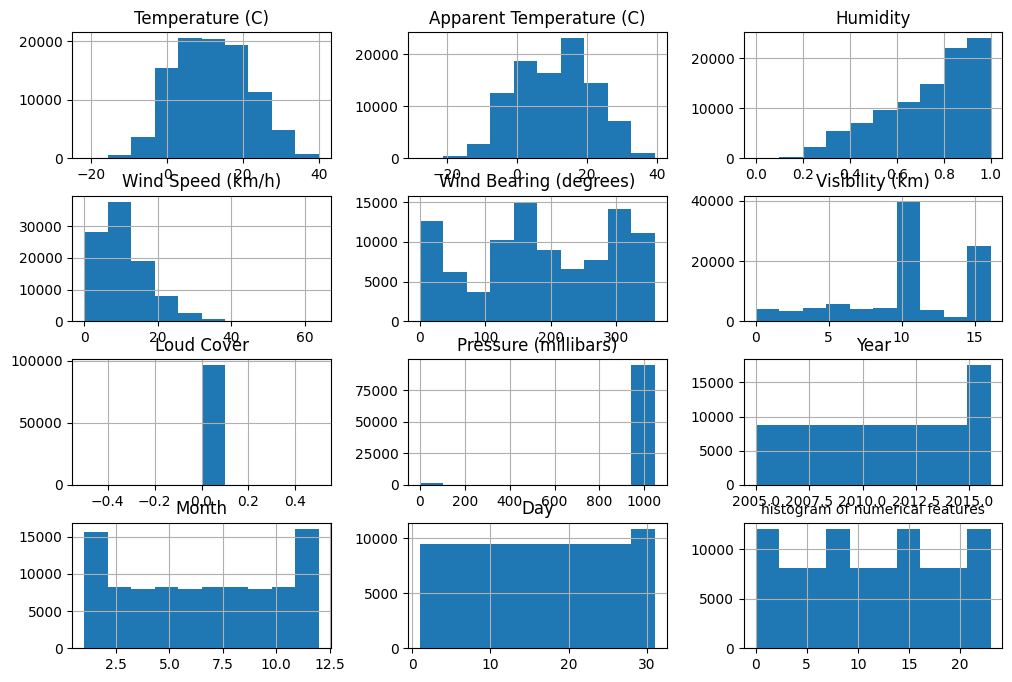

In [23]:
# Histogram for numerical variables
df.hist(figsize=(12,8))
plt.title('histogram of numerical features',fontsize=10)
plt.show()

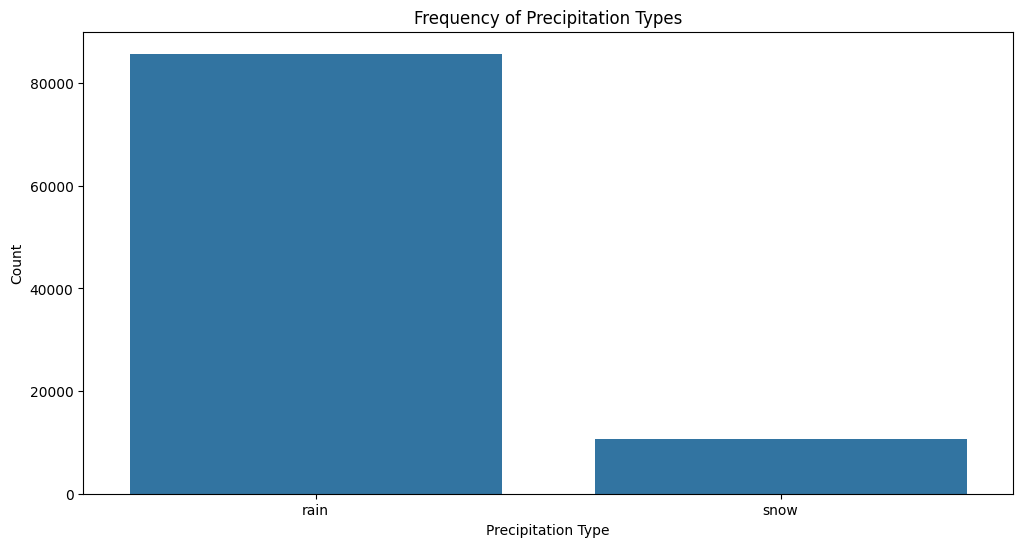

In [24]:
#Bar Plot of Precipitation Types
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Precip Type')
plt.title('Frequency of Precipitation Types')
plt.xlabel('Precipitation Type')
plt.ylabel('Count')
plt.show()

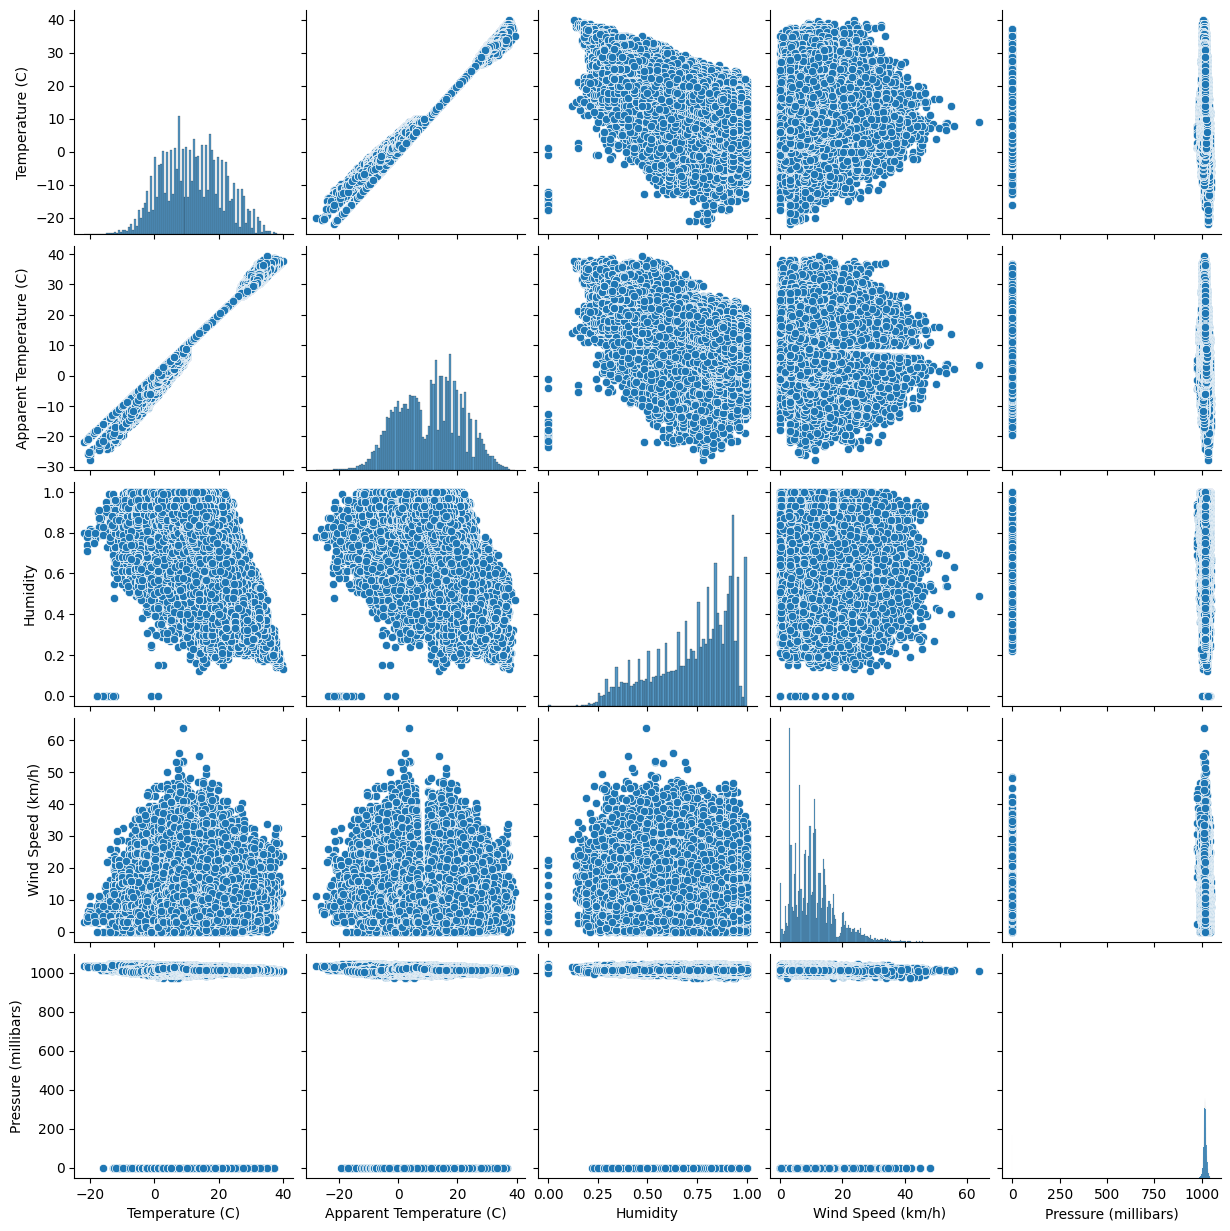

In [25]:
# Pairplot for numerical variables
sns.pairplot(df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']])
plt.show()

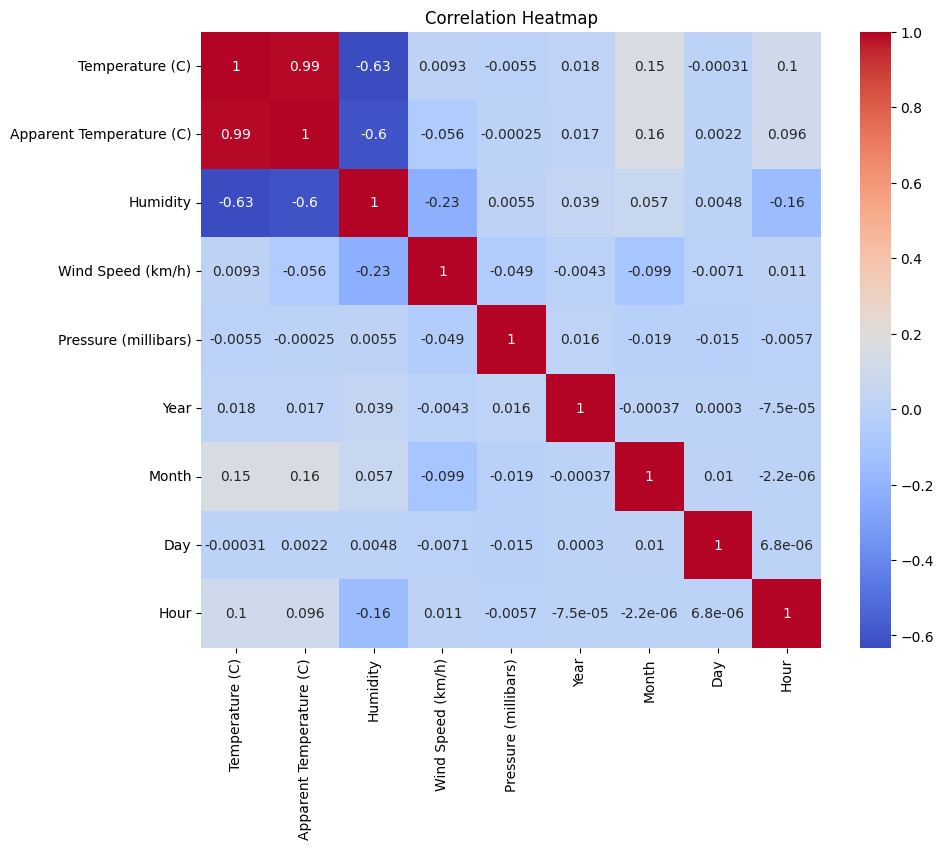

In [26]:
# Correlation heatmap for numerical variables
numerical_cols = ['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)','Year','Month','Day','Hour']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

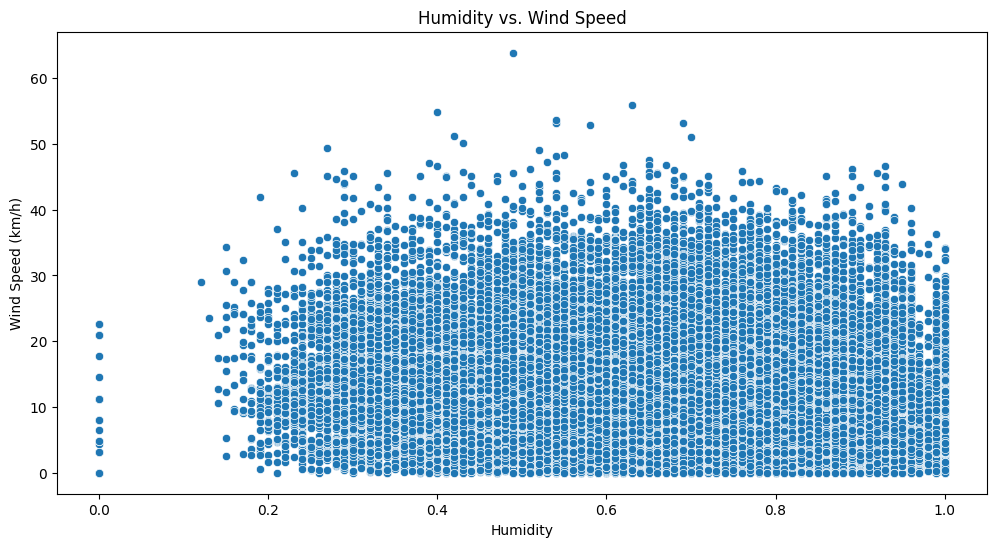

In [27]:
# Scatter Plot of Humidity vs. Wind Speed
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Humidity', y='Wind Speed (km/h)')
plt.title('Humidity vs. Wind Speed')
plt.xlabel('Humidity')
plt.ylabel('Wind Speed (km/h)')
plt.show()

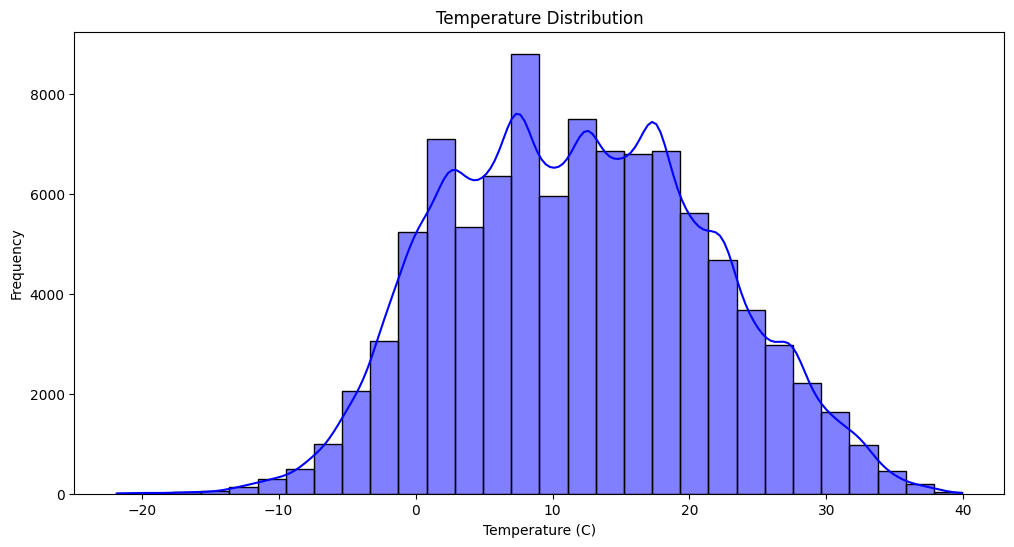

In [28]:
# Distribution of Temperature
plt.figure(figsize=(12, 6))
sns.histplot(df['Temperature (C)'], bins=30, kde=True, color='blue')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (C)')
plt.ylabel('Frequency')
plt.show()

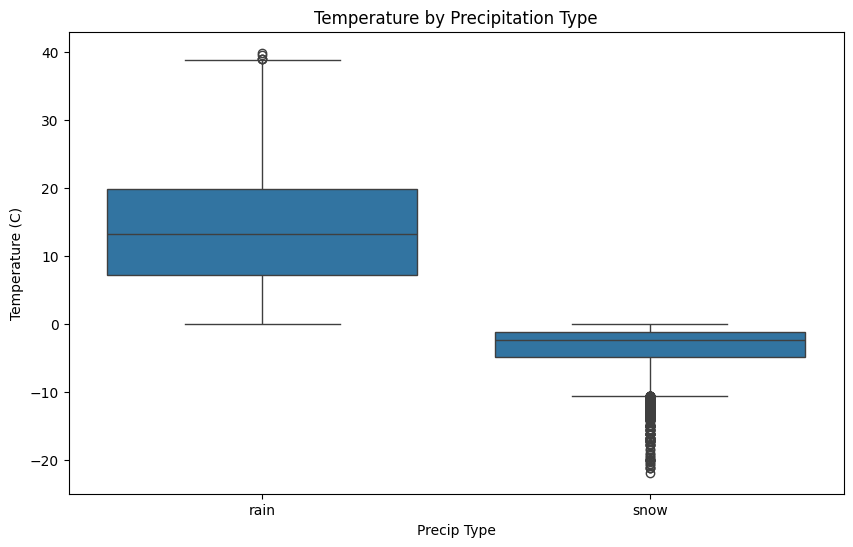

In [29]:
#Box Plot of Temperature Distribution by Precipitation Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Precip Type', y='Temperature (C)', data=df)
plt.title('Temperature by Precipitation Type')
plt.show()

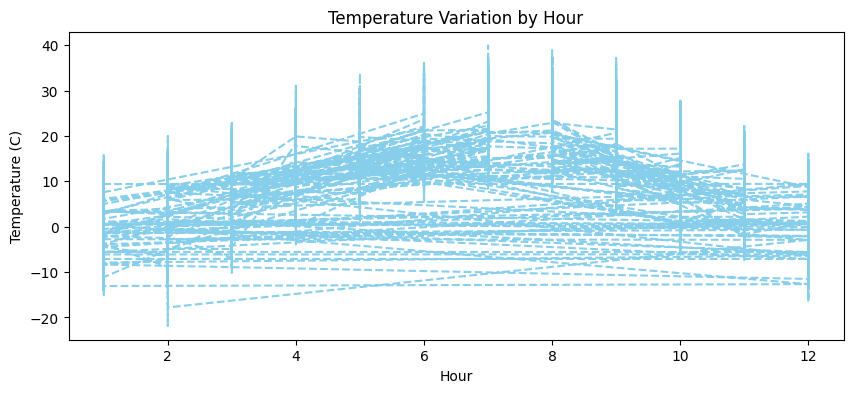

In [31]:
#  Temperature Variation by Hour
plt.figure(figsize=(10, 4))
plt.plot(df['Month'], df['Temperature (C)'], color='skyblue',linestyle='--')
plt.title('Temperature Variation by Hour')
plt.xlabel('Hour')
plt.ylabel('Temperature (C)')
plt.show()


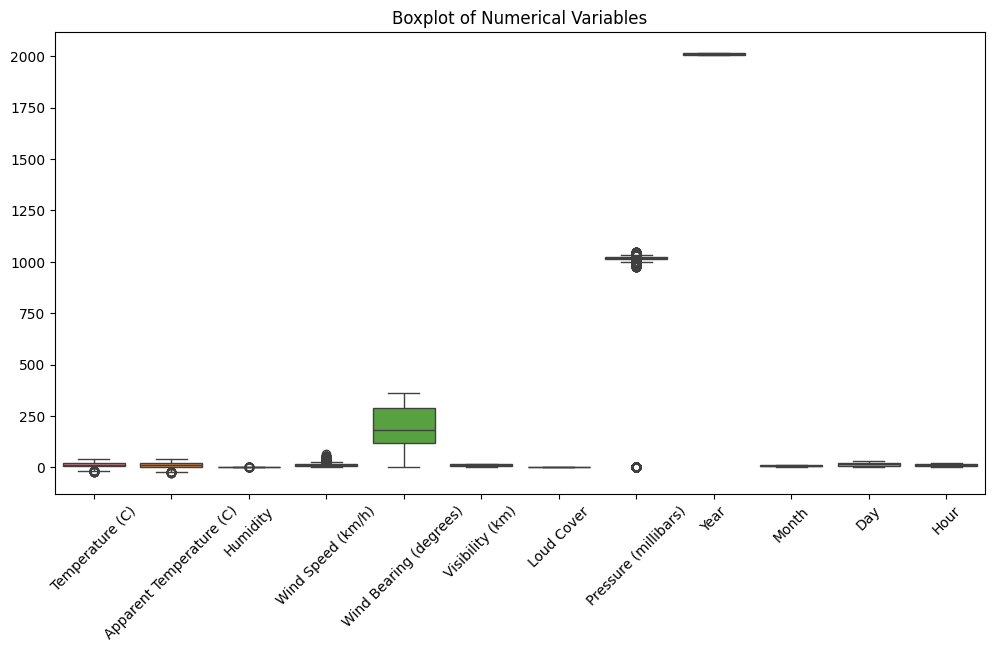

In [31]:
#Box plot of numerical variables
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Boxplot of Numerical Variables')
plt.xticks(rotation=45)
plt.show()

In [32]:
#Find outliers 
#Compute Z-score for selected numerical columns
numerical_cols = ["Temperature (C)", "Apparent Temperature (C)", "Humidity",
                  "Wind Speed (km/h)", "Wind Bearing (degrees)", "Visibility (km)","Loud Cover",
                  "Pressure (millibars)","Year","Month","Day","Hour"]
z_scores = (df[numerical_cols] - df[numerical_cols].mean()) / df[numerical_cols].std()


In [33]:
# Set threshold for outlier detection 
threshold = 3
# Find outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)
outliers_count = outliers.sum()
print(outliers_count)


Temperature (C)               39
Apparent Temperature (C)      40
Humidity                      28
Wind Speed (km/h)           1208
Wind Bearing (degrees)         0
Visibility (km)                0
Loud Cover                     0
Pressure (millibars)        1288
Year                           0
Month                          0
Day                            0
Hour                           0
dtype: int64


In [34]:
# Remove outliers
cleaned_df = df[~outliers.any(axis=1)]

# Print the cleaned DataFrame
print(cleaned_df)

             Summary Precip Type  Temperature (C)  Apparent Temperature (C)  \
0      Partly Cloudy        rain         9.472222                  7.388889   
1      Partly Cloudy        rain         9.355556                  7.227778   
2      Mostly Cloudy        rain         9.377778                  9.377778   
3      Partly Cloudy        rain         8.288889                  5.944444   
4      Mostly Cloudy        rain         8.755556                  6.977778   
...              ...         ...              ...                       ...   
96448  Partly Cloudy        rain        26.016667                 26.016667   
96449  Partly Cloudy        rain        24.583333                 24.583333   
96450  Partly Cloudy        rain        22.038889                 22.038889   
96451  Partly Cloudy        rain        21.522222                 21.522222   
96452  Partly Cloudy        rain        20.438889                 20.438889   

       Humidity  Wind Speed (km/h)  Wind Bearing (d

##### Label Encoding

In [35]:
label_encoder=LabelEncoder()
cat_cols=['Precip Type','Summary','Daily Summary']
for col in cat_cols:
    df[col]=label_encoder.fit_transform(df[col])
df.head()    

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour
0,19,0,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,197,2006,3,31,22
1,19,0,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,197,2006,3,31,23
2,17,0,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,197,2006,4,1,0
3,19,0,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,197,2006,4,1,1
4,17,0,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,197,2006,4,1,2


### Feature Selection

In [36]:
#Split features and target variable
x=df.drop(columns=['Summary'])
y=df ['Summary']
print(x)
print(y)

       Precip Type  Temperature (C)  Apparent Temperature (C)  Humidity  \
0                0         9.472222                  7.388889      0.89   
1                0         9.355556                  7.227778      0.86   
2                0         9.377778                  9.377778      0.89   
3                0         8.288889                  5.944444      0.83   
4                0         8.755556                  6.977778      0.83   
...            ...              ...                       ...       ...   
96448            0        26.016667                 26.016667      0.43   
96449            0        24.583333                 24.583333      0.48   
96450            0        22.038889                 22.038889      0.56   
96451            0        21.522222                 21.522222      0.60   
96452            0        20.438889                 20.438889      0.61   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
0                1

In [37]:
# Remove classes with fewer than 2 instances
class_counts = y.value_counts()
valid_classes = class_counts[class_counts > 1].index
x = x[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]

In [38]:
#Split the data into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
#Initialize Random Forest Classifier
rf =  RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
importances = rf.feature_importances_
feature_importance=pd.Series(importances,index=x.columns).sort_values(ascending=False)



In [40]:
print(feature_importance)

Daily Summary               0.175641
Visibility (km)             0.148636
Wind Speed (km/h)           0.087400
Pressure (millibars)        0.087361
Humidity                    0.080400
Temperature (C)             0.076304
Apparent Temperature (C)    0.072496
Wind Bearing (degrees)      0.068492
Hour                        0.060527
Day                         0.056443
Year                        0.045013
Month                       0.037724
Precip Type                 0.003563
Loud Cover                  0.000000
dtype: float64


In [41]:
#select top 14 features
top_features=feature_importance.index[:14]
print(top_features)


Index(['Daily Summary', 'Visibility (km)', 'Wind Speed (km/h)',
       'Pressure (millibars)', 'Humidity', 'Temperature (C)',
       'Apparent Temperature (C)', 'Wind Bearing (degrees)', 'Hour', 'Day',
       'Year', 'Month', 'Precip Type', 'Loud Cover'],
      dtype='object')


In [42]:
#Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x[top_features],y,test_size=0.2,random_state=42)

In [43]:
x_train.head()

,Daily Summary,Visibility (km),Wind Speed (km/h),Pressure (millibars),Humidity,Temperature (C),Apparent Temperature (C),Wind Bearing (degrees),Hour,Day,Year,Month,Precip Type,Loud Cover
9611,111,11.0768,22.3951,1009.85,0.51,25.827778,25.827778,300,9,13,2007,8,0,0
91795,63,15.1823,0.0000,1014.54,0.84,23.216667,23.216667,0,20,27,2016,7,0,0
3350,170,9.9015,12.7190,1030.85,0.40,-0.161111,-4.138889,126,13,27,2006,1,1,0
16913,169,11.3988,18.6760,1017.52,0.55,18.016667,18.016667,312,15,12,2007,9,0,0
78781,111,10.2557,12.4936,1014.92,0.65,22.922222,22.922222,70,14,4,2014,9,0,0


In [44]:
#Feature scaling
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

### Model building

Logistic Regression is a statistical method used to predict a binary outcome (such as yes/no or true/false)from a set of input variables.It calculates the probability of a specific outcome and uses the logistic function to ensure the result is between 0 and 1.

In [45]:
# Building Logistic Regression Model
#Initialize Logistic Regression model
log_reg=LogisticRegression(max_iter=1000)

In [46]:
#Train Logistic Regression model
log_reg.fit(x_train_scaled,y_train)

LogisticRegression(max_iter=1000)

In [47]:
#Make prediction on the test data
y_pred_log_reg=log_reg.predict(x_test_scaled)

### Model evaluation

In [48]:
#Accuracy
accuracy=accuracy_score(y_test,y_pred_log_reg)
print(accuracy)

0.5536658716167168


In [49]:
print(classification_report(y_test,y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.83      0.42      0.56        12
           2       0.50      0.75      0.60         4
           3       0.48      0.43      0.45       115
           4       0.54      0.60      0.57        99
           5       0.70      0.59      0.64        83
           6       0.46      0.09      0.15      2191
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00        19
          12       0.88      0.95      0.91      1453
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00        13
          17       0.48      0.49      0.48      5653
          18       0.49      0.45      0.47      3270
          19       0.57    

C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [50]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred_log_reg)
print(cm)

[[   5    0    1    2    0    0    0    0    0    0    1    0    0    0
     0    1    2    0    0    0    0    0]
 [   0    3    0    0    0    0    0    0    0    0    1    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0   49   36   13    0    0    0    0    0    0    0    0    0
     0   10    5    2    0    0    0    0]
 [   1    3   19   59    2    0    0    0    0    0    0    0    0    0
     0    5   10    0    0    0    0    0]
 [   0    0   16    6   49    1    0    0    0    0    0    0    0    0
     0    6    2    3    0    0    0    0]
 [   0    0    0    0    0  191    0    1    0    0   55    0    0    0
     0  417  227 1300    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    1    0    0    0
     0    2    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    2    0    6    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0  

### Building multiple models

#### SVC

Support Vector Classification (SVC) is a machine learning algorithm used for classification tasks. It finds the best boundary (called a hyperplane) that separates data points of different classes.

In [51]:
#Initialize SVC model
svc_model=SVC()


In [52]:
#Train SVC model
svc_model.fit(x_train_scaled,y_train)


SVC()

In [53]:
#Make prediction on the test data
y_pred_svc=svc_model.predict(x_test_scaled)


In [54]:
#Accuracy
svc_accuracy=accuracy_score(y_test,y_pred_svc)
print(svc_accuracy)


0.6112724255936949


In [55]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.75      0.25      0.38        12
           2       0.57      1.00      0.73         4
           3       0.50      0.50      0.50       115
           4       0.60      0.53      0.56        99
           5       0.67      0.60      0.63        83
           6       0.66      0.29      0.40      2191
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00        19
          12       0.92      0.98      0.95      1453
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00        13
          17       0.53      0.57      0.55      5653
          18       0.60      0.51      0.55      3270
          19       0.61    

C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [56]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred_svc)
print(cm)

[[   3    0    1    0    2    3    0    0    0    0    1    0    0    0
     0    0    1    1    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0   57   26   15    0    0    0    0    0    0    0    0    0
     0   12    3    2    0    0    0    0]
 [   0    3   25   52    1    0    0    0    0    0    1    0    0    0
     0    2   14    1    0    0    0    0]
 [   0    0   17    3   50    1    0    0    0    0    0    0    0    0
     0    3    1    7    0    0    0    1]
 [   0    0    0    0    0  633    0    0    0    0   26    0    0    0
     0  258  160 1114    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    1    0    0    0
     0    2    0    0    0    0    0    0]
 [   0    0    0    0    0    2    0    0    0    0    0    0    0    0
     0    0    0    6    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0  

#### DecisionTreeClassifier

Decision Tree Classifier is a machine learning method used to classify data. It works by splitting the data into different branches based on certain conditions, creating a tree-like structure that leads to a decision or classification at each branch.

In [57]:
#Initialize DecisionTreeClassifier model
dt_model=DecisionTreeClassifier()

In [58]:
#Train DecisionTreeModel
dt_model.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [59]:
#Make prediction on the test data
y_pred_dt=dt_model.predict(x_test_scaled)

In [60]:
#Accuracy
dt_accuracy=accuracy_score(y_test,y_pred_dt)
print(dt_accuracy)

0.6503681426941823


In [61]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.50      0.42      0.45        12
           2       1.00      0.75      0.86         4
           3       0.52      0.60      0.56       115
           4       0.65      0.61      0.63        99
           5       0.72      0.63      0.67        83
           6       0.65      0.65      0.65      2191
           8       0.12      0.33      0.18         3
           9       0.43      0.38      0.40         8
          10       0.33      0.33      0.33         3
          11       0.33      0.26      0.29        19
          12       1.00      1.00      1.00      1453
          13       0.13      0.22      0.17         9
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.69      0.69      0.69        13
          17       0.58      0.58      0.58      5653
          18       0.62      0.65      0.64      3270
          19       0.66    

C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [62]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred_dt)
print(cm)

[[   5    0    2    1    3    0    0    0    0    0    0    0    0    0
     0    0    0    1    0    0    0    0    0]
 [   0    3    0    0    0    0    0    0    0    0    1    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   2    0   69   19   12    1    0    0    0    1    0    0    0    0
     0    7    2    2    0    0    0    0    0]
 [   0    0   30   60    4    0    0    0    0    0    0    0    0    0
     0    5    0    0    0    0    0    0    0]
 [   1    0   20    2   52    1    0    0    0    0    0    0    0    0
     0    4    0    3    0    0    0    0    0]
 [   1    0    0    2    0 1417    1    3    0    2    0    0    0    0
     0  152   83  530    0    0    0    0    0]
 [   0    0    0    0    0    0    1    0    0    0    0    0    0    0
     0    2    0    0    0    0    0    0    0]
 [   0    0    0    0    0    3    0    3    0    0    0    0    0    0
     0    0    0    2    0    0    0    0    0]
 [   0    0    0    0    0    0    0    

#### MLPClassifier

MLP Classifier stands for Multi-Layer Perceptron Classifier, which is a type of artificial neural network used for classification tasks. It consists of multiple layers of nodes (perceptrons) and learns to classify input data by adjusting weights between nodes during training.

In [63]:
#Initialize MLPClassifier model
mlp_model = MLPClassifier(max_iter=1000, early_stopping=True, random_state=42)

In [64]:
#Train MLPClassifier model
mlp_model.fit(x_train_scaled,y_train)

MLPClassifier(early_stopping=True, max_iter=1000, random_state=42)

In [65]:
#Make prediction on the test data
y_pred_mlp=mlp_model.predict(x_test_scaled)


In [66]:
#Accuracy
mlp_accuracy=accuracy_score(y_test,y_pred_mlp)
print(mlp_accuracy)

0.6273462615368661


In [67]:
print(classification_report(y_test,y_pred_mlp))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           2       0.50      0.75      0.60         4
           3       0.64      0.49      0.55       115
           4       0.61      0.66      0.63        99
           5       0.72      0.61      0.66        83
           6       0.64      0.51      0.57      2191
           8       0.25      0.33      0.29         3
           9       0.50      0.12      0.20         8
          10       0.00      0.00      0.00         3
          11       0.33      0.16      0.21        19
          12       0.96      0.98      0.97      1453
          13       0.67      0.22      0.33         9
          14       0.00      0.00      0.00         2
          15       1.00      0.20      0.33         5
          16       0.70      0.54      0.61        13
          17       0.55      0.56      0.55      5653
          18       0.59      0.57      0.58      3270
          19       0.64    

C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [68]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred_mlp)
print(cm)

[[   5    0    1    1    1    2    0    0    0    0    1    0    0    0
     0    0    1    0    0    0    0    0    0]
 [   0    3    0    0    0    0    0    0    0    0    1    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0   56   25   12    0    0    0    0    0    0    0    0    0
     0   12    6    2    0    0    0    0    2]
 [   0    3   10   65    3    0    0    0    0    0    0    0    0    0
     0    3   14    0    0    0    0    1    0]
 [   0    0   11    7   51    1    0    0    0    0    0    0    0    0
     0    7    0    6    0    0    0    0    0]
 [   0    0    0    0    0 1118    0    1    0    1   18    0    0    0
     0  201  164  688    0    0    0    0    0]
 [   0    0    0    0    0    0    1    0    0    0    0    0    0    0
     0    2    0    0    0    0    0    0    0]
 [   0    0    0    0    0    3    0    1    0    0    0    0    0    0
     0    0    0    4    0    0    0    0    0]
 [   0    0    0    0    0    0    0    

#### Naive Bayes 

Naive Bayes Algorithm is a probabilistic machine learning method used for classification tasks. It assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature, hence "naive". It calculates the probability of each class given a set of input features using Bayes' theorem.

In [69]:
# Initialize Naive Bayes model
nb_model = GaussianNB()

In [70]:
# Train Naive Bayes model
nb_model.fit(x_train_scaled,y_train)

GaussianNB()

In [71]:
#Make prediction on the test data
y_pred_nb=nb_model.predict(x_test_scaled)

In [72]:
#Accuracy
nb_accuracy=accuracy_score(y_test,y_pred_nb)
print(nb_accuracy)

0.30975837395001554


In [73]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.21      0.33      0.26        12
           2       0.44      1.00      0.62         4
           3       0.38      0.13      0.19       115
           4       0.39      0.26      0.31        99
           5       0.35      0.11      0.17        83
           6       0.58      0.07      0.13      2191
           8       0.00      0.67      0.00         3
           9       0.01      0.38      0.02         8
          10       0.01      1.00      0.02         3
          11       0.01      0.47      0.02        19
          12       0.73      0.79      0.76      1453
          13       0.01      1.00      0.02         9
          14       0.00      0.00      0.00         2
          15       0.04      0.20      0.07         5
          16       0.00      0.54      0.00        13
          17       0.41      0.17      0.24      5653
          18       0.34      0.30      0.32      3270
          19       0.52    

C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [74]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred_nb)
print(cm)

[[   4    0    0    2    0    0    0    1    1    0    0    0    0    0
     1    0    1    0    0    2    0    0    0]
 [   0    4    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0   15   19    8    0    0    1    2    3    0    2    0    0
     4    1    2    1    0    1   44    0   12]
 [   3    2    8   26    1    0    0    0    0    0    0    1    0    0
    24    1    1    1    0    0   27    0    4]
 [   1    0    4    4    9    0    0    2    1   10    0    0    0    0
     0    1    0    2    0    0   20    0   29]
 [   5    0    0    0    0  160  173   54   36   74   47   70    0    1
   229  229  390  722    0    0    0    0    1]
 [   0    0    0    0    0    0    2    0    0    0    0    0    0    0
     0    1    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    3    4    0    0    0    0    0
     0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0    0    0    

#### Random Forest

Random Forest is a machine learning algorithm used for classification and regression tasks. It constructs multiple decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.


In [75]:
# Initialize Random Forest model
rf = RandomForestClassifier()


In [76]:
#Train the Random Forest model
rf.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [77]:
# Make predictions on the test set
y_pred_rf = rf.predict(x_test_scaled)


In [78]:
# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(rf_accuracy)

0.7334335787617962


In [79]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           2       1.00      0.75      0.86         4
           3       0.55      0.63      0.58       115
           4       0.70      0.70      0.70        99
           5       0.74      0.70      0.72        83
           6       0.81      0.67      0.73      2191
           8       0.25      0.33      0.29         3
           9       0.67      0.25      0.36         8
          10       0.00      0.00      0.00         3
          11       0.83      0.26      0.40        19
          12       1.00      1.00      1.00      1453
          13       0.50      0.22      0.31         9
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.88      0.54      0.67        13
          17       0.66      0.66      0.66      5653
          18       0.75      0.73      0.74      3270
          19       0.71    

C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [80]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred_rf)
print(cm)

[[   4    0    2    2    1    2    0    0    0    0    0    0    0    0
     0    0    0    1    0    0    0    0    0]
 [   0    3    0    0    0    0    0    0    0    0    1    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0   72   18   15    1    0    0    0    0    0    0    0    0
     0    6    2    1    0    0    0    0    0]
 [   0    0   24   69    2    0    0    0    0    0    0    0    0    0
     0    0    4    0    0    0    0    0    0]
 [   0    0   16    2   58    0    0    0    0    0    0    0    0    0
     0    2    0    4    0    0    0    0    1]
 [   0    0    0    0    0 1462    0    0    0    0    0    0    0    0
     0  110   67  552    0    0    0    0    0]
 [   0    0    0    0    0    0    1    0    0    0    0    0    0    0
     0    0    1    1    0    0    0    0    0]
 [   0    0    0    0    0    2    0    2    0    0    0    0    0    0
     0    0    0    4    0    0    0    0    0]
 [   0    0    0    0    0    0    0    

#### K-Nearest Neighbors

k-Nearest Neighbors (k-NN) is a machine learning algorithm used for classification and regression tasks. It predicts the classification of a new data point by comparing it with the k closest data points in the training set.

In [81]:
## Initialize KNN model
knn_model=KNeighborsClassifier()

In [82]:
#Train the KNN model
knn_model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [83]:
# Make predictions on the test set
y_pred_knn= knn_model.predict(x_test_scaled)

In [84]:
#Accuracy
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(knn_accuracy)

0.653219952297003


In [85]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           2       1.00      0.75      0.86         4
           3       0.55      0.63      0.58       115
           4       0.70      0.70      0.70        99
           5       0.74      0.70      0.72        83
           6       0.81      0.67      0.73      2191
           8       0.25      0.33      0.29         3
           9       0.67      0.25      0.36         8
          10       0.00      0.00      0.00         3
          11       0.83      0.26      0.40        19
          12       1.00      1.00      1.00      1453
          13       0.50      0.22      0.31         9
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         5
          16       0.88      0.54      0.67        13
          17       0.66      0.66      0.66      5653
          18       0.75      0.73      0.74      3270
          19       0.71    

C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Noufiya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [86]:
#Confusion matrix
cm=confusion_matrix(y_test,y_pred_knn)
print(cm)

[[   4    0    0    0    2    3    0    0    0    0    0    0    0    0
     0    0    2    1    0    0    0    0]
 [   0    4    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]
 [   0    0   52   15   12    0    0    0    0    0    0    0    0    0
     0   27    4    3    0    0    0    2]
 [   0    1   21   41    1    0    0    0    0    0    3    0    0    0
     0   11   19    2    0    0    0    0]
 [   0    0   18    2   38    1    0    0    0    0    0    0    0    0
     0    9    1   13    0    0    0    1]
 [   0    0    0    0    1 1272    0    1    0    2   37    0    0    0
     0  217   81  580    0    0    0    0]
 [   0    0    0    0    0    0    1    0    0    0    0    0    0    0
     0    1    0    1    0    0    0    0]
 [   0    0    0    0    0    3    0    2    0    0    0    0    0    0
     0    0    0    3    0    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0    0    0    0    0
     0  

In [87]:

model_names = ['Logistic Regression','SVC','Decision Tree','MLPClassifier','Naive Bayes','Random Forest','KNN']
accuracy_scores = [0.55, 0.61,0.65, 0.62, 0.30, 0.73, 0.65,]  
model_df=pd.DataFrame({'model':model_names,'Accuracy':accuracy_scores})
model_df

,model,Accuracy
0,Logistic Regression,0.55
1,SVC,0.61
2,Decision Tree,0.65
3,MLPClassifier,0.62
4,Naive Bayes,0.30
5,Random Forest,0.73
6,KNN,0.65


#### Hyperparameter Tuning

In [88]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],        # Number of trees in the forest
    'max_features': [None, 'sqrt', 'log2'] # Number of features to consider at every split
            
}


In [89]:
# Initialize the StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

In [90]:

# Initialize the GridSearchCV with stratified cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,cv=stratified_cv )


In [91]:
# Train the model with GridSearchCV
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [93]:

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Best parameters found:  {'max_features': None, 'n_estimators': 200}


In [94]:
best_score = grid_search.best_score_
print("Best cross-validation score: ", best_score)

Best cross-validation score:  0.7313974591651543


In [95]:
# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
y_pred_rf = best_rf.predict(x_test_scaled)

In [96]:
# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy of the tuned Random Forest: ", rf_accuracy)

Accuracy of the tuned Random Forest:  0.7395520066369388


#### Save the model

In [100]:
from joblib import dump
#Save the trained model
dump(rf,'rf.joblib')

['rf.joblib']

### Conclusion
Among the various models tested, the Random Forest classifier achieved the highest accuracy of 0.73. This indicates that the Random Forest model performs better in predicting the target variable compared to the other models listed.